# Implementation of some essential ML functions
- The objective of this notebook is not to provide efficient implementations, but to practice/learn 

In [16]:
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)

(X.shape, y.shape)

((506, 13), (506,))

In [17]:
import pandas as pd

df = pd.DataFrame(X, y).reset_index().rename(columns={"index": "target"})

In [18]:
df.shape

(506, 14)

## train_test_split

In [4]:
import numpy as np

def split_train_test(data, test_ratio, random_seed=42):
    np.random.seed(random_seed)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [5]:
train, test = split_train_test(df, 0.2)

In [6]:
train.head(3)

,target,0,1,2,3,4,5,6,7,8,9,10,11,12
75,21.4,0.09512,0.0,12.83,0.0,0.437,6.286,45.0,4.5026,5.0,398.0,18.7,383.23,8.94
477,12.0,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,19.9,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47


In [7]:
test.head(3)

,target,0,1,2,3,4,5,6,7,8,9,10,11,12
173,23.6,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,32.4,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,13.6,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07


## train_test_split without numpy

In [3]:
import random

def train_test_split(data, split=0.2, random_seed=42):
    random.seed(random_seed)
    train = []
    train_size = (1-split) * len(data)
    data_copy = list(data)
    while len(train) < train_size:
        index = random.randrange(len(data_copy))
        train.append(data_copy.pop(index))
    return train, data_copy

In [4]:
data = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
train, test = train_test_split(data)
print(train)
print(test)

[[2], [1], [7], [4], [5], [6], [3], [10]]
[[8], [9]]


## train_test_split without numpy without loop

In [10]:
import random

def train_test_split(data, split=0.2, random_seed=42):
    random.seed(random_seed)
    train = []
    shuffled_indexes = random.sample(list(data), len(data))
    test_size = int(split * len(data))
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]
    return train_indexes, test_indexes

In [15]:
data = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
train, test = train_test_split(data)
print(train)
print(test)

[[5], [10], [7], [6], [9], [3], [4], [8]]
[[2], [1]]


## k-fold cross validation

In [21]:
import random

def kfoldcv(indexes, k=10, random_seed=42):
    size = len(indexes)
    subset_size = round(size / k)
    random.Random(random_seed).shuffle(indexes)
    subsets = [indexes[x:x+subset_size] for x in range(0, 
                                                       len(indexes), 
                                                       subset_size)]
    kfolds = []
    for i in range(k):
        test = subsets[i]
        train = []
        for subset in subsets:
            if subset != test:
                train.append(subset)
        kfolds.append((train,test))
        
    return kfolds

In [24]:
kfolds = kfoldcv(data)
kfolds

[([[[9]], [[3]], [[1]], [[7]], [[10]], [[2]], [[6]], [[8]], [[4]]], [[5]]),
 ([[[5]], [[3]], [[1]], [[7]], [[10]], [[2]], [[6]], [[8]], [[4]]], [[9]]),
 ([[[5]], [[9]], [[1]], [[7]], [[10]], [[2]], [[6]], [[8]], [[4]]], [[3]]),
 ([[[5]], [[9]], [[3]], [[7]], [[10]], [[2]], [[6]], [[8]], [[4]]], [[1]]),
 ([[[5]], [[9]], [[3]], [[1]], [[10]], [[2]], [[6]], [[8]], [[4]]], [[7]]),
 ([[[5]], [[9]], [[3]], [[1]], [[7]], [[2]], [[6]], [[8]], [[4]]], [[10]]),
 ([[[5]], [[9]], [[3]], [[1]], [[7]], [[10]], [[6]], [[8]], [[4]]], [[2]]),
 ([[[5]], [[9]], [[3]], [[1]], [[7]], [[10]], [[2]], [[8]], [[4]]], [[6]]),
 ([[[5]], [[9]], [[3]], [[1]], [[7]], [[10]], [[2]], [[6]], [[4]]], [[8]]),
 ([[[5]], [[9]], [[3]], [[1]], [[7]], [[10]], [[2]], [[6]], [[8]]], [[4]])]

## k-fold cv investigating

In [64]:
import random

def kfoldcv(indexes, k=3, random_seed=42):
    size = len(indexes)
    random.seed(random_seed)
    subset_size = int(size / k)
    shuffled_indexes = random.sample(list(indexes), size)
    subsets = [
        shuffled_indexes[x:x+subset_size] for x in range(0,
                                                         size, 
                                                         subset_size)]
    kfolds = []
    for i in range(k):
        test = subsets[i]
        train = []
        for subset in subsets:
            if subset != test:
                train.append(subset)
        kfolds.append((train, test))
    
    return kfolds

In [65]:
kfolds = kfoldcv(data)
kfolds

[([[[4], [2], [10]], [[8], [3], [1]], [[6]]], [[9], [5], [7]]),
 ([[[9], [5], [7]], [[8], [3], [1]], [[6]]], [[4], [2], [10]]),
 ([[[9], [5], [7]], [[4], [2], [10]], [[6]]], [[8], [3], [1]])]

When the division between size of the indexes and k is not perfect, the 
```python
subsets = [shuffled_indexes[x:x+subset_size] for x in range(0 , size, subset_size)]
```

isn't right. As you can see with k=3 and len(indexes)=10, 3 subsets with 3 elements and 1 subset with 1 element. So, we asked for 3 folds and got 4?!

In [121]:
size = len(data)
k = 3

In [122]:
size / k

3.3333333333333335

In [125]:
size // k

3

In [124]:
size % k

1

### If the difference between (size//k) and (size%k) is greater than 1 we should do it differently than the list comprehension above

From Sklearn implementation:
The first ``n_samples % n_splits`` folds have size
    ``n_samples // n_splits + 1``, other folds have size
    ``n_samples // n_splits``, where ``n_samples`` is the number of samples

In [114]:
import random

def kfoldcv(indexes, k=10, random_seed=42):
    random.seed(random_seed)
    size = len(indexes)
    # using sample to avoid shuffling the indexes inplace
    shuffled_indexes = random.sample(list(indexes), size)
    fold_sizes = [size // k for i in range(k)]
    for i in range(size%k):
        fold_sizes[i] += 1
    
    current = 0
    subsets = []
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        subsets.append(shuffled_indexes[start:stop])
        current = stop
        
    kfolds = []
    for i in range(k):
        test = subsets[i]
        train = []
        for subset in subsets:
            if subset != test:
                train.append(subset)
        kfolds.append((train, test))
    
    return kfolds

In [120]:
kfoldcv(data, k=3)

[([[[2], [10], [8]], [[3], [1], [6]]], [[9], [5], [7], [4]]),
 ([[[9], [5], [7], [4]], [[3], [1], [6]]], [[2], [10], [8]]),
 ([[[9], [5], [7], [4]], [[2], [10], [8]]], [[3], [1], [6]])]

In [117]:
kfoldcv(data, k=2)

[([[[10], [8], [3], [1], [6]]], [[9], [5], [7], [4], [2]]),
 ([[[9], [5], [7], [4], [2]]], [[10], [8], [3], [1], [6]])]

In [118]:
kfoldcv(data, k=4)

[([[[4], [2], [10]], [[8], [3]], [[1], [6]]], [[9], [5], [7]]),
 ([[[9], [5], [7]], [[8], [3]], [[1], [6]]], [[4], [2], [10]]),
 ([[[9], [5], [7]], [[4], [2], [10]], [[1], [6]]], [[8], [3]]),
 ([[[9], [5], [7]], [[4], [2], [10]], [[8], [3]]], [[1], [6]])]

In [119]:
kfoldcv(data, k=5)

[([[[7], [4]], [[2], [10]], [[8], [3]], [[1], [6]]], [[9], [5]]),
 ([[[9], [5]], [[2], [10]], [[8], [3]], [[1], [6]]], [[7], [4]]),
 ([[[9], [5]], [[7], [4]], [[8], [3]], [[1], [6]]], [[2], [10]]),
 ([[[9], [5]], [[7], [4]], [[2], [10]], [[1], [6]]], [[8], [3]]),
 ([[[9], [5]], [[7], [4]], [[2], [10]], [[8], [3]]], [[1], [6]])]

Well, it seems to work now

## Simple Neural Network (Perceptron)

In [6]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

training_inputs = np.array([[0, 0, 1],
                            [1, 1, 1],
                            [1, 0, 1],
                            [0, 1, 1]])

training_outputs = np.array([[0, 1, 1, 0]]).T

np.random.seed(42)

synaptic_weights = 2 * np.random.random((3, 1)) - 1

print("Random starting weights: ")
print(synaptic_weights)

Random starting weights: 
[[-0.25091976]
 [ 0.90142861]
 [ 0.46398788]]


In [13]:
n_epochs = 20000
for epoch in range(n_epochs):
    input_layer = training_inputs
    outputs = sigmoid(np.dot(input_layer, synaptic_weights))
    error = training_outputs - outputs
    adjustments = error * sigmoid_derivative(outputs)
    synaptic_weights += np.dot(input_layer.T, adjustments)

In [14]:
print("Weights after training: ")
print(synaptic_weights)

Weights after training: 
[[10.38126204]
 [-0.20654574]
 [-4.98486842]]


In [15]:
print("Outputs after training: ")
print(outputs)

Outputs after training: 
[[0.00679437]
 [0.99445789]
 [0.99548744]
 [0.00553348]]


# Raschka's book Perceptron implementation

In [1]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

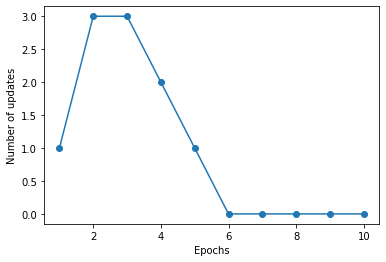

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [8]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

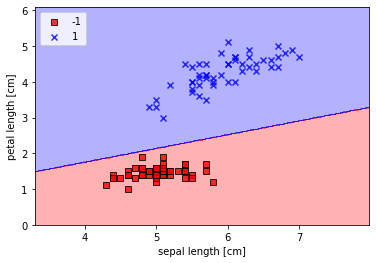

In [9]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Adaline with Stochastic Gradient Descent

In [10]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [11]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

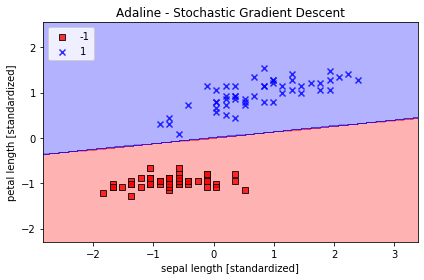

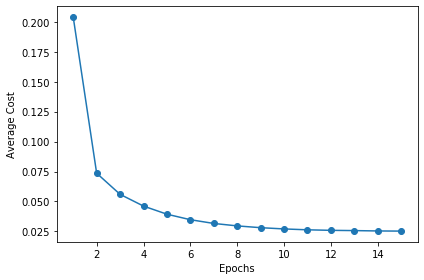

In [12]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()

plt.show()